In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install pandas fiona shapely pyproj rtree

In [ ]:
!pip install geopandas # The order in which we install dependencies is very important (it is recommended in the docs)

In [ ]:
import geopandas as gpd

In [ ]:
import matplotlib.pyplot as plt

# Load Data

<Axes: >

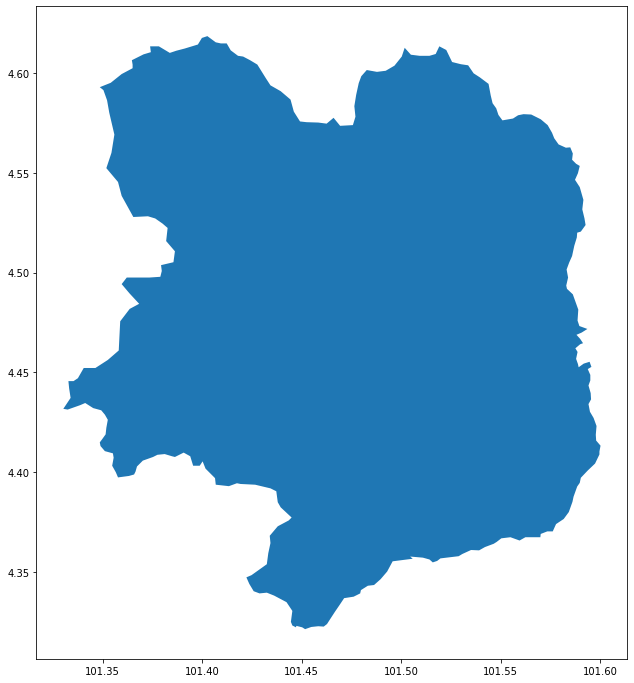

In [ ]:
SA1 = gpd.read_file('/content/drive/MyDrive/Asignaturas/APPR/US regions/Study_Area_1.shp')
SA1.plot(figsize=(12,12))

<Axes: >

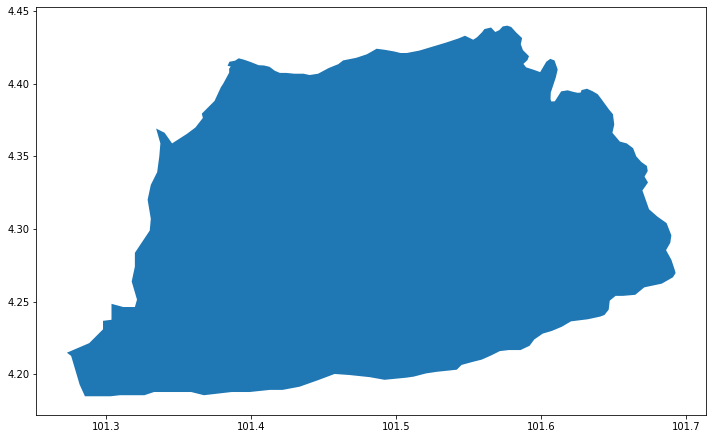

In [ ]:
SA2 = gpd.read_file('/content/drive/MyDrive/Asignaturas/APPR/US regions/Study_Area_2.shp')
SA2.plot(figsize=(12,12))

<Axes: >

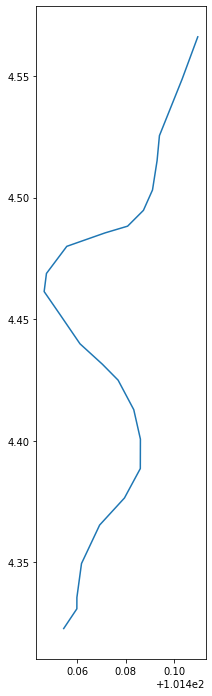

In [ ]:
river = gpd.read_file('/content/drive/MyDrive/Asignaturas/APPR/US regions/river.shp')
river.plot(figsize=(12,12))

<Axes: >

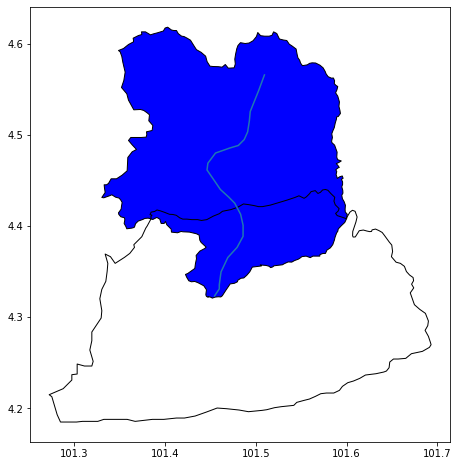

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
SA1.plot(ax = ax, color = 'blue', edgecolor = 'black')
SA2.plot(ax = ax, color = 'none', edgecolor = 'black') # color none
river.plot(ax = ax)

# Polygon intersections

When two polygons overlap and we want to capture the area in which they intersect

In [ ]:
intersection = gpd.overlay(SA1, SA2, how = 'intersection')

<Axes: >

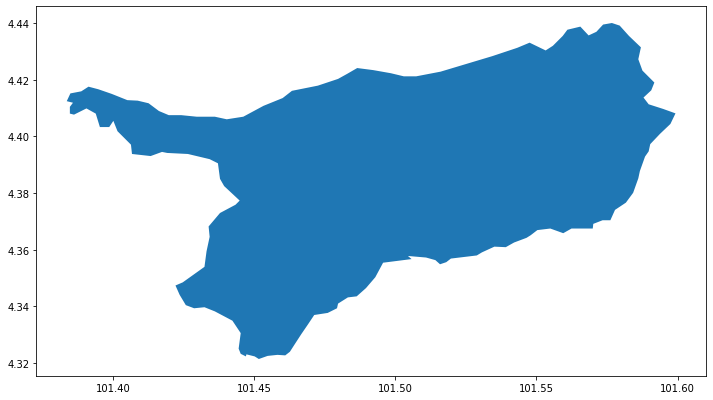

In [ ]:
intersection.plot(figsize=(12,12))

# Union of Polygons

When two polygons overlap and we want to create the union. In the case of two polygons, it will produce three polygons, the external 1, the external 2 and the union of both.

In [ ]:
union = gpd.overlay(SA1, SA2, how = 'union')

<Axes: >

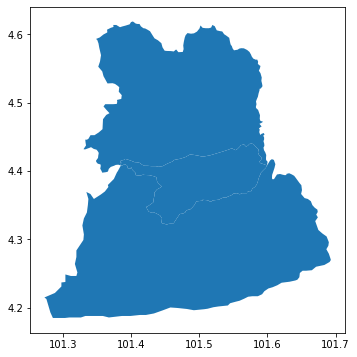

In [ ]:
union.plot(figsize=(6,6))

In [ ]:
union

,desc_1,desc_2,geometry
0,Study_Area_1,Study_Area_2,"POLYGON ((101.44529 4.33050, 101.44236 4.33488..."
1,Study_Area_1,NaN,"POLYGON ((101.38479 4.40801, 101.38112 4.40910..."
2,NaN,Study_Area_2,"POLYGON ((101.38479 4.40801, 101.38626 4.40764..."


# Dissolve polygons

When we want to create a single polygon with the union of all of them.

In [ ]:
dissolved_sa = union.dissolve()

<Axes: >

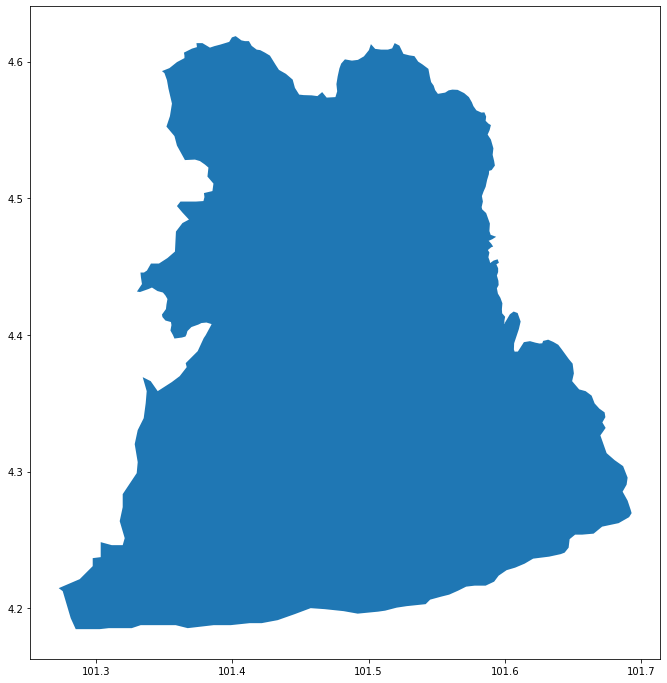

In [ ]:
dissolved_sa.plot(figsize=(12,12))

In [ ]:
dissolved_sa

,geometry,desc_1,desc_2
0,"POLYGON ((101.59948 4.40801, 101.60370 4.41514...",Study_Area_1,Study_Area_2


# Symetrical difference of polygons

When we want to obtain the part of the polygons that do not overlap.

In [ ]:
sd = gpd.overlay(SA1, SA2, how = 'symmetric_difference')

<Axes: >

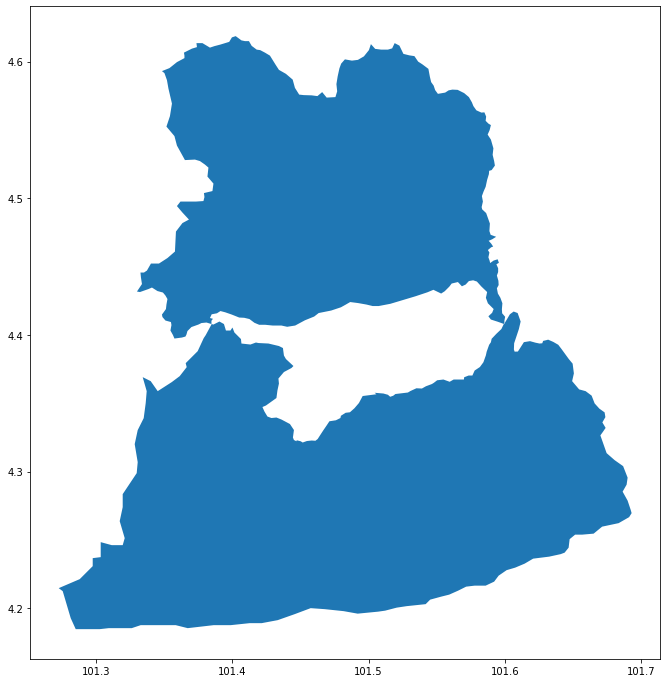

In [ ]:
sd.plot(figsize=(12,12))

In [ ]:
sd

,desc_1,desc_2,geometry
0,Study_Area_1,NaN,"POLYGON ((101.38479 4.40801, 101.38112 4.40910..."
1,NaN,Study_Area_2,"POLYGON ((101.38479 4.40801, 101.38626 4.40764..."


# Difference of polygons

In this case the order of the difference is important. It is a matter of eliminating as many regions as overlapping of the first polygon with respect to the second.

<Axes: >

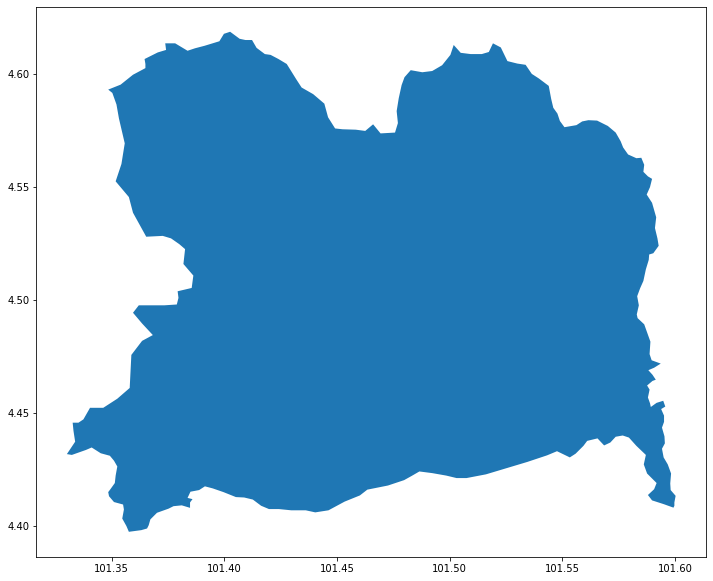

In [ ]:
difference = gpd.overlay(SA1, SA2, how = 'difference')
difference.plot(figsize=(12,12))

<Axes: >

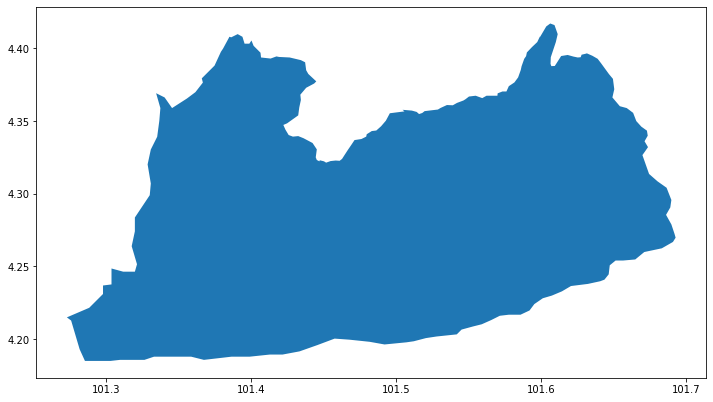

In [ ]:
difference = gpd.overlay(SA2, SA1, how = 'difference')
difference.plot(figsize=(12,12))

# Buffer

When we want to obtain an expanded area around a polygon (this is usually done with lines). BE AWARE OF CRS!!

In [ ]:
river.crs

In [ ]:
projected_river = river.to_crs(epsg=24547) # The river is a real one set in Malaysia (epsg = 24547)

In [ ]:
buffer_500m = projected_river['geometry'].buffer(distance = 500)

<Axes: >

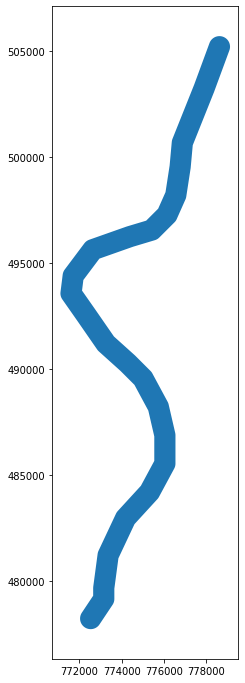

In [ ]:
buffer_500m.plot(figsize=(12,12))

<ipython-input-31-2aafa1683dd1>:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  river.buffer(distance = .1).plot(figsize=(12,12)) # ... what happened?


<Axes: >

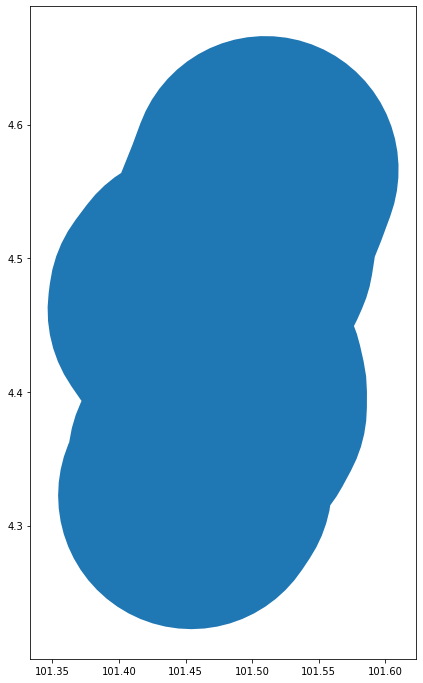

In [ ]:
# Student work: what if we did not change crs?
river.buffer(distance = .1).plot(figsize=(12,12)) # ... what happened?

<Axes: >

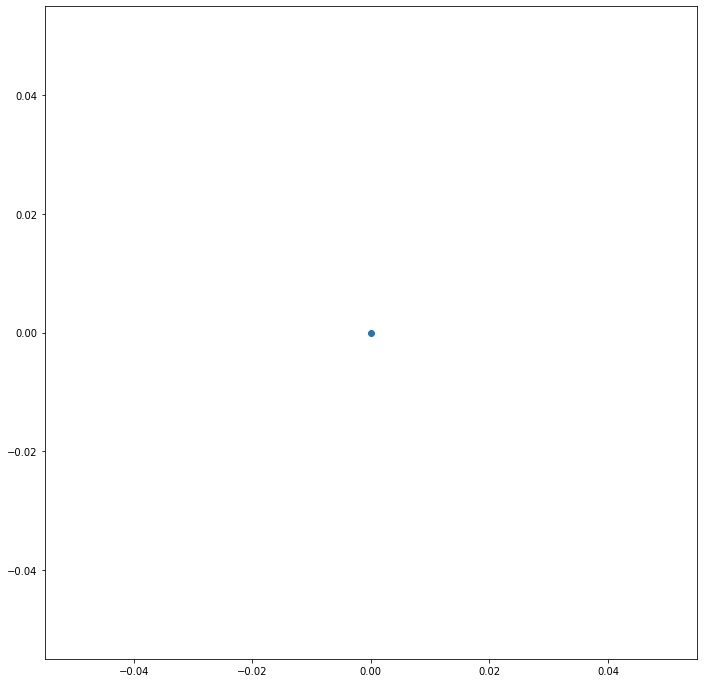

In [ ]:
# Student work: does this work with points?
# Create a point with shapely
from shapely.geometry import Point
point = Point([0, 0])
point_df = gpd.GeoDataFrame(geometry=[point], crs=2062)
point_df.plot(figsize=(12,12))

<Axes: >

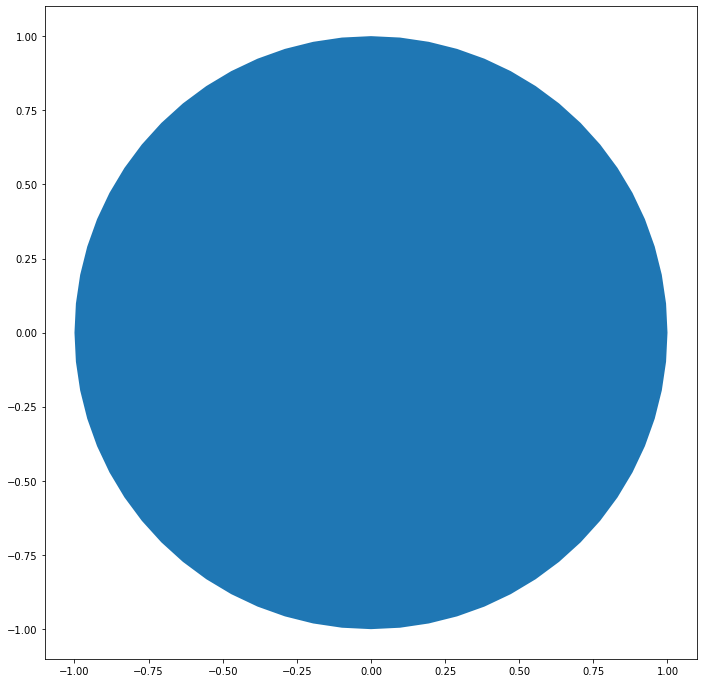

In [ ]:
point_df.buffer(1).plot(figsize=(12,12))

In [ ]:
point_df.buffer(1).area

0    3.136548
dtype: float64

In [ ]:
point_df_crs2 = gpd.GeoDataFrame(geometry=[point], crs=24547)

<Axes: >

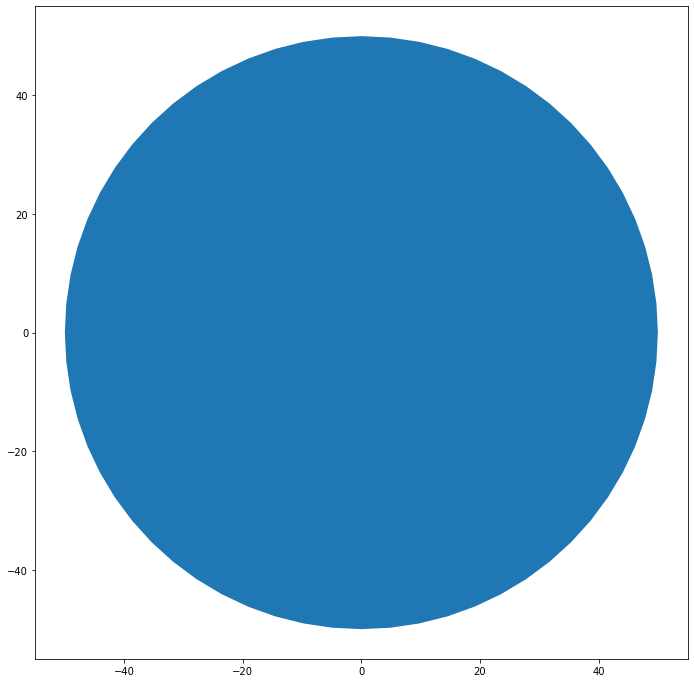

In [ ]:
point_df_crs2.buffer(50).plot(figsize=(12,12))

In [ ]:
point_df_crs2.buffer(50).area

0    7841.371226
dtype: float64

In [ ]:
3.14 * 50 ** 2

7850.0

# Centroid

Get the center of mass of a polygon

In [ ]:
centroids = union.centroid

<ipython-input-39-2a8a91f0f279>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = union.centroid


<Axes: >

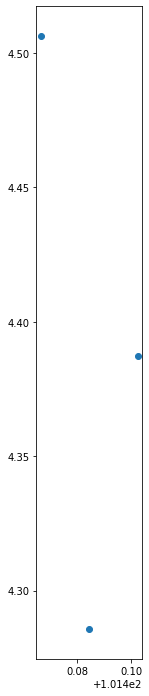

In [ ]:
centroids.plot(figsize=(12,12))

<Axes: >

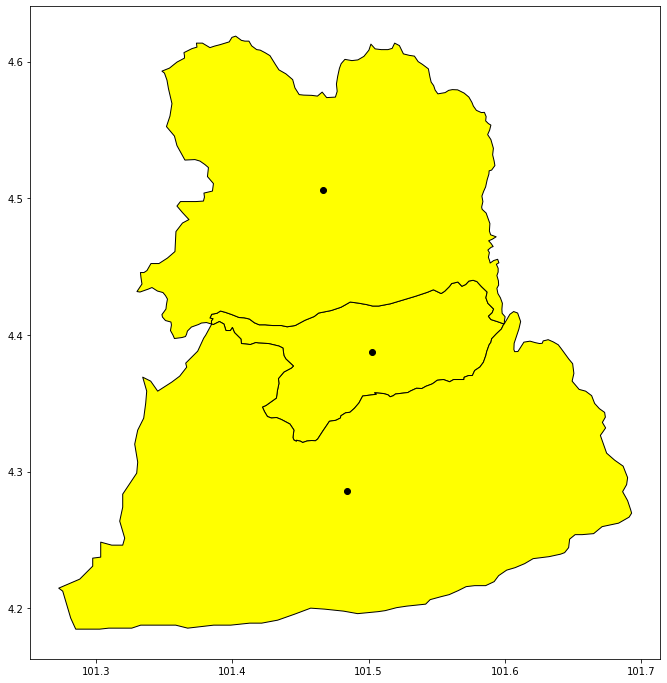

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
union.plot(ax = ax, color = 'yellow', edgecolor = 'black')
centroids.plot(ax = ax, color = 'black')

# Convert from lat lon to coords

We are going to create our own geometries with shapely

In [ ]:
import pandas as pd

In [ ]:
airports_data = pd.read_csv('/content/drive/MyDrive/Asignaturas/APPR/US regions/us_airports.csv')

In [ ]:
airports_data

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228
...,...,...,...,...,...,...,...
335,WRG,Wrangell,Wrangell,AK,USA,56.484326,-132.369824
336,WYS,Yellowstone,West Yellowstone,MT,USA,44.688399,-111.117638
337,XNA,Northwest Arkansas Regional,Fayetteville Springdale Rogers,AR,USA,36.281869,-94.306811
338,YAK,Yakutat,Yakutat,AK,USA,59.503361,-139.660226


In [ ]:
from shapely.geometry import Point

In [ ]:
geometry = [Point(x, y) for x, y in zip(airports_data['LONGITUDE'], airports_data['LATITUDE'])]

In [ ]:
airports_us = gpd.GeoDataFrame(airports_data, geometry = geometry, crs = 4326)

<Axes: >

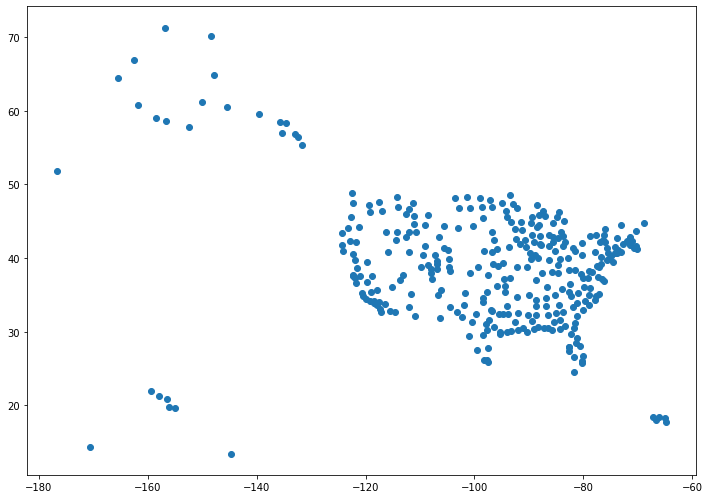

In [ ]:
airports_us.plot(figsize=(12,12))

In [ ]:
airports_us

In [ ]:
# There may be other type of attributes, not only latitude longitude, but address. In that case we "geocode" the address. We can use a client like: https://www.dcode.fr/geocoding

# Join attributes

This is just a proof that you can work with geopandas as well as pandas. We are going to make a join of some data, exactly as when we make merge with data in pandas.

In [ ]:
state_names_codes = pd.read_csv('/content/drive/MyDrive/Asignaturas/APPR/US regions/state names and codes.csv')

In [ ]:
state_names_codes # It contains state names and codes

,state_name,state_code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [ ]:
airports_us.rename(columns = {"STATE": "state_code"}, inplace = True)

In [ ]:
airports_us = airports_us.merge(state_names_codes, on = "state_code")

In [ ]:
airports_us

,IATA,AIRPORT,CITY,state_code,COUNTRY,LATITUDE,LONGITUDE,geometry,state_name
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194,POINT (-106.60919 35.04022),New Mexico
1,HOB,Lea County Regional,Hobbs,NM,USA,32.687528,-103.217028,POINT (-103.21703 32.68753),New Mexico
2,ROW,Roswell Industrial Air Center,Roswell,NM,USA,33.301556,-104.530556,POINT (-104.53056 33.30156),New Mexico
3,SAF,Santa Fe Municipal,Santa Fe,NM,USA,35.616778,-106.088139,POINT (-106.08814 35.61678),New Mexico
4,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872,POINT (-97.66987 30.19453),Texas
...,...,...,...,...,...,...,...,...,...
150,RKS,Rock Springs-Sweetwater County,Rock Springs,WY,USA,41.594217,-109.065193,POINT (-109.06519 41.59422),Wyoming
151,CRW,Yeager,Charleston,WV,USA,38.373151,-81.593190,POINT (-81.59319 38.37315),West Virginia
152,HTS,Tri-State Walker-Long,Huntington,WV,USA,38.366667,-82.558028,POINT (-82.55803 38.36667),West Virginia
153,LWB,Greenbrier Valley,Lewisburg,WV,USA,37.858306,-80.399472,POINT (-80.39947 37.85831),West Virginia


# Spatial Join

We want to make links relying exclusively on geospatial data. This tool is used A LOT.

In [ ]:
us_states = gpd.read_file('/content/drive/MyDrive/Asignaturas/APPR/US regions/us_states.shp')

<Axes: >

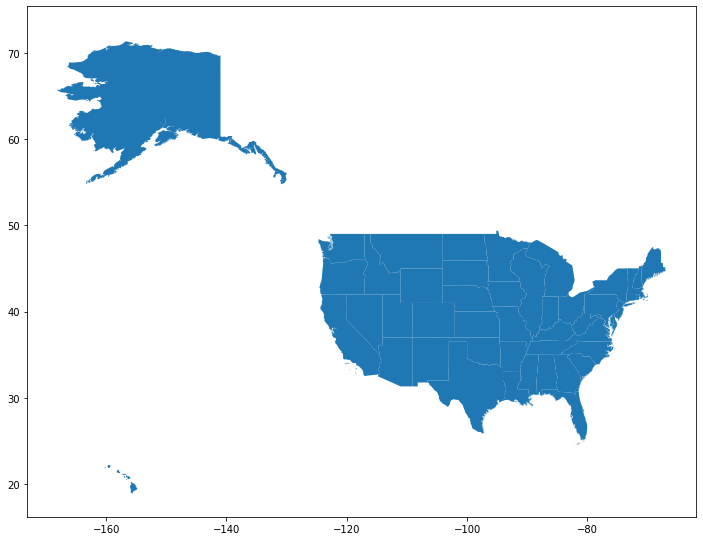

In [ ]:
us_states.plot(figsize=(12,12))

<Axes: >

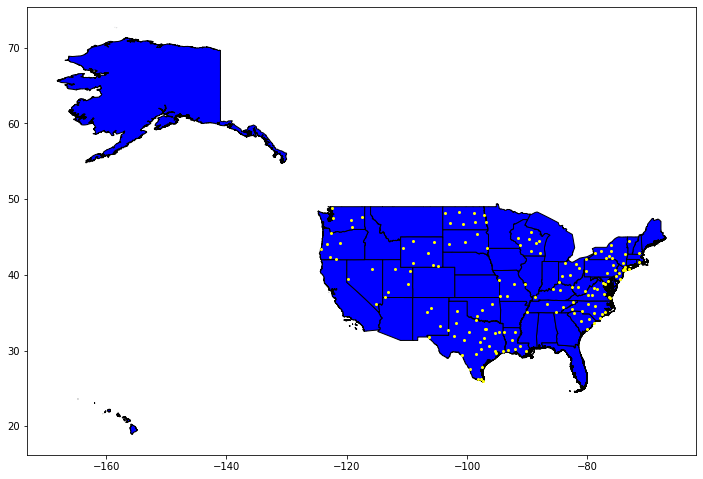

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
us_states.plot(ax = ax, color = 'blue', edgecolor = 'black')
airports_us.plot(ax = ax, markersize=4, color="yellow") 

In [ ]:
airports_us = gpd.sjoin(airports_us, us_states, how="inner", op="intersects") # how specifies the index: left, right inner... | op specifies the operation. Intersect will get objects that are inside the boundaries of the geometry

In [ ]:
airports_us

In [ ]:
# another example
spanish_provinces = gpd.read_file('/content/drive/MyDrive/Asignaturas/APPR/projects data/spanish_provinces.geojson')

In [ ]:
import random

In [ ]:
x = [random.uniform(-9, 4) for i in range(100)]
y = [random.uniform(36, 44) for i in range(100)]

In [ ]:
from shapely.geometry import Point

In [ ]:
geometry = [Point(x, y) for x, y in zip(x, y)]

In [ ]:
puntos = gpd.GeoDataFrame(geometry = geometry, crs = spanish_provinces.crs)

<Axes: >

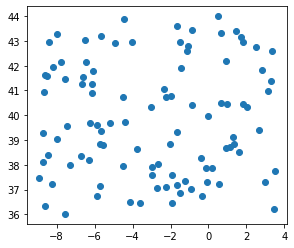

In [ ]:
puntos.plot()

<Axes: >

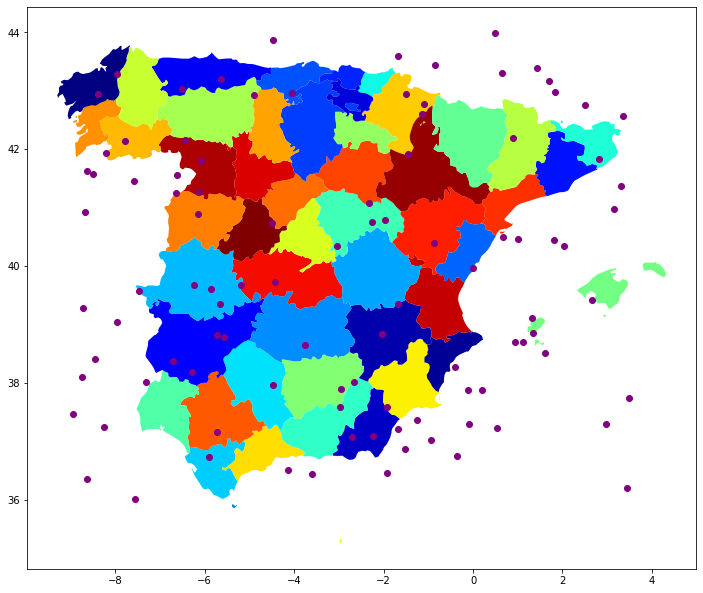

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
spanish_provinces.plot(ax = ax, cmap = 'jet', column = 'rotulo')
puntos.plot(ax = ax, color = "purple") # color none, edgecolor = 'black'

In [ ]:
spanish_provinces_with_points = gpd.sjoin(spanish_provinces, puntos, how="right", op="intersects")
# Student work: change how to left, right, inner 
# Student work: change the order of puntos and spanish_provinces

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


<Axes: >

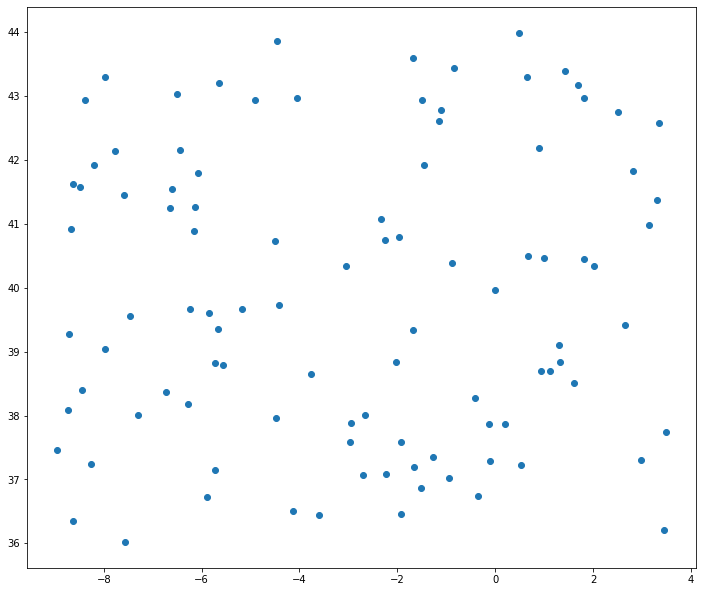

In [ ]:
spanish_provinces_with_points.plot(figsize=(12,12))

In [ ]:
spanish_provinces_with_points

,index_left,rotulo,population,time_light_sun,geometry
0,NaN,NaN,NaN,NaN,POINT (3.49218 37.74651)
1,NaN,NaN,NaN,NaN,POINT (1.82367 42.97411)
2,NaN,NaN,NaN,NaN,POINT (-4.13248 36.51006)
3,NaN,NaN,NaN,NaN,POINT (2.98036 37.30062)
4,20.0,Cáceres,1.183986e+06,4.0,POINT (-5.65877 39.35103)
...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,POINT (-0.35717 36.73920)
96,NaN,NaN,NaN,NaN,POINT (3.14595 40.98485)
97,36.0,Navarra,1.480422e+06,7.0,POINT (-1.48939 42.94963)
98,15.0,Badajoz,1.333095e+06,5.0,POINT (-5.57314 38.79241)
